In [1]:
import pandas as pd
import numpy as np
import re
import os 
os.chdir('C:/Users/etisalat/Desktop/SAT')
os.listdir()

['ap_2010.csv',
 'class_size.csv',
 'demographics.csv',
 'graduation.csv',
 'hs_directory.csv',
 'sat_results.csv',
 'Survey_Data_Dictionary.xls']

Mapping NYC data in dictionary

In [2]:
data_files = [
    "ap_2010.csv",
    "class_size.csv",
    "demographics.csv",
    "graduation.csv",
    "hs_directory.csv",
    "sat_results.csv"
]

data = {}

for f in data_files:
    d = pd.read_csv("{0}".format(f))
    data[f.replace(".csv", "")] = d

In [3]:
pd.options.display.max_columns=100
pd.options.display.max_rows=100000

Cleaning the AP test Takers 

In [4]:
cols=['AP Test Takers ','Total Exams Taken','Number of Exams with scores 3 4 or 5']
for col in cols:
    data['ap_2010'][col]=pd.to_numeric(data['ap_2010'][col],errors='coerce')
data['ap_2010'].head()    
 

,DBN,SchoolName,AP Test Takers,Total Exams Taken,Number of Exams with scores 3 4 or 5
0,01M448,UNIVERSITY NEIGHBORHOOD H.S.,39.0,49.0,10.0
1,01M450,EAST SIDE COMMUNITY HS,19.0,21.0,NaN
2,01M515,LOWER EASTSIDE PREP,24.0,26.0,24.0
3,01M539,"NEW EXPLORATIONS SCI,TECH,MATH",255.0,377.0,191.0
4,02M296,High School of Hospitality Management,NaN,NaN,NaN


cleaning and grouping the class size data

In [5]:
data['class_size']['DBN']=data['class_size']['CSD'].apply(lambda x : str(x).zfill(2) if x<10 else str(x))+data['class_size']['SCHOOL CODE'].apply(lambda x :str(x))
data['class_size']=data['class_size'].drop(['CSD','SCHOOL CODE','BOROUGH'],axis=1)
data['class_size']=data['class_size'][data['class_size']['GRADE ']=='09-12']
data['class_size']=data['class_size'][['DBN','AVERAGE CLASS SIZE']].reset_index(drop=True)
data['class_size']=data['class_size'].groupby('DBN').mean().astype(int).reset_index()
data['class_size'].head()

,DBN,AVERAGE CLASS SIZE
0,01M292,22
1,01M332,18
2,01M378,33
3,01M448,23
4,01M450,21


Cleaning the demographics data

In [6]:
data['demographics']=data['demographics'].replace('    ',np.nan).dropna(how='all',subset=['grade9','grade10','grade11','grade12'])
data['demographics']=data['demographics'][data['demographics']['schoolyear']==20092010]
data['demographics']=data['demographics'][['DBN','grade12','ell_percent','sped_percent','asian_per','black_per','hispanic_per','white_per','male_per','female_per']].reset_index(drop=True)
data['demographics'].head()

,DBN,grade12,ell_percent,sped_percent,asian_per,black_per,hispanic_per,white_per,male_per,female_per
0,01M292,55,15.9,21.9,10.2,27.6,56.8,3.1,58.1,41.9
1,01M448,68,5.3,23.1,18.0,27.1,46.4,4.7,53.8,46.2
2,01M450,84,6.6,28.8,7.5,27.0,57.4,5.5,53.5,46.5
3,01M509,69,12.5,21.3,11.6,18.5,67.9,2.0,50.6,49.4
4,01M515,92,83.8,0.7,90.9,4.4,4.4,0.4,57.0,43.0


Cleaning the graduation data

In [7]:
data['graduation']=data['graduation'][data['graduation']['Cohort']=='2006 Aug']
data['graduation']=data['graduation'][['DBN','Total Cohort']].groupby('DBN').mean().astype(int).reset_index()
data['graduation'].head()

,DBN,Total Cohort
0,01M292,35
1,01M448,55
2,01M450,40
3,01M509,38
4,01M515,96


Cleaning the High School Directory data

In [8]:
data['hs_directory']=data['hs_directory'][['dbn','Location 1']]
data['hs_directory'].columns=['DBN','Location']
data['hs_directory']=data['hs_directory'].sort_values(['DBN']).reset_index(drop=True)

import re
lat=[]
lon=[]
for index, row in data['hs_directory'].iterrows():
    lat.append(float(re.search('\(.+\,',data['hs_directory'].iloc[index,1]).group().replace('(','').replace(',','')))
    lon.append(float(re.search('\,.+\)',data['hs_directory'].iloc[index,1]).group().replace(', ','').replace(')','')))

data['hs_directory']['lat']=lat
data['hs_directory']['lon']=lon
data['hs_directory']=data['hs_directory'].drop(['Location'],axis=1)
data['hs_directory'].head()

,DBN,lat,lon
0,01M292,40.713764,-73.985260
1,01M448,40.712332,-73.984797
2,01M450,40.729783,-73.983041
3,01M509,40.720569,-73.985673
4,01M539,40.718725,-73.979426


Cleaning the sat results Data

In [9]:
results_cols=['SAT Critical Reading Avg. Score', 'SAT Math Avg. Score', 'SAT Writing Avg. Score']
for col in results_cols:
    data['sat_results'][col]=pd.to_numeric(data['sat_results'][col],errors='coerce')
data['sat_results']['sat_score']=data['sat_results'][results_cols[0]]+data['sat_results'][results_cols[1]]+data['sat_results'][results_cols[2]]
data['sat_results'].head()

,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score,sat_score
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29,355.0,404.0,363.0,1122.0
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,91,383.0,423.0,366.0,1172.0
2,01M450,EAST SIDE COMMUNITY SCHOOL,70,377.0,402.0,370.0,1149.0
3,01M458,FORSYTH SATELLITE ACADEMY,7,414.0,401.0,359.0,1174.0
4,01M509,MARTA VALLE HIGH SCHOOL,44,390.0,433.0,384.0,1207.0


Prepaing to combine the data files

In [10]:
DBN={}
for k , v in data.items():
    DBN[k]=data['sat_results']['DBN'].isin(data[k]['DBN']).sum()
    
DBN

{'ap_2010': 253,
 'class_size': 434,
 'demographics': 432,
 'graduation': 389,
 'hs_directory': 369,
 'sat_results': 478}

Combining the data files

In [11]:
combined=data['sat_results']
combined=combined.merge(data['ap_2010'],on='DBN',how='left')
combined=combined.merge(data['graduation'],on='DBN',how='left')
combined=combined.merge(data['class_size'],on='DBN',how='left')
combined=combined.merge(data['demographics'],on='DBN',how='inner')
combined=combined.merge(data['hs_directory'],on='DBN',how='inner')

Imputing the missing data

In [12]:
combined = combined.fillna(combined.mean())
combined = combined.fillna(0)

Extracting a new column for the school district

In [13]:
def get_first_two_chars(dbn):
    return dbn[0:2]

combined["school_dist"] = combined["DBN"].apply(get_first_two_chars)


Display the combined data

In [14]:
combined.head()

,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score,sat_score,SchoolName,AP Test Takers,Total Exams Taken,Number of Exams with scores 3 4 or 5,Total Cohort,AVERAGE CLASS SIZE,grade12,ell_percent,sped_percent,asian_per,black_per,hispanic_per,white_per,male_per,female_per,lat,lon,school_dist
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29,355.0,404.0,363.0,1122.0,0,128.464115,196.148325,153.45,35.0,22.0,55,15.9,21.9,10.2,27.6,56.8,3.1,58.1,41.9,40.713764,-73.985260,01
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,91,383.0,423.0,366.0,1172.0,UNIVERSITY NEIGHBORHOOD H.S.,39.000000,49.000000,10.00,55.0,23.0,68,5.3,23.1,18.0,27.1,46.4,4.7,53.8,46.2,40.712332,-73.984797,01
2,01M450,EAST SIDE COMMUNITY SCHOOL,70,377.0,402.0,370.0,1149.0,EAST SIDE COMMUNITY HS,19.000000,21.000000,153.45,40.0,21.0,84,6.6,28.8,7.5,27.0,57.4,5.5,53.5,46.5,40.729783,-73.983041,01
3,01M509,MARTA VALLE HIGH SCHOOL,44,390.0,433.0,384.0,1207.0,0,128.464115,196.148325,153.45,38.0,19.0,69,12.5,21.3,11.6,18.5,67.9,2.0,50.6,49.4,40.720569,-73.985673,01
4,01M539,"NEW EXPLORATIONS INTO SCIENCE, TECHNOLOGY AND ...",159,522.0,574.0,525.0,1621.0,"NEW EXPLORATIONS SCI,TECH,MATH",255.000000,377.000000,191.00,23.0,25.0,47,0.5,3.2,25.2,11.6,15.8,44.6,47.6,52.4,40.718725,-73.979426,01


The association between the sat score and English language learners, demographics percent, gender and school location

In [15]:
correlations = combined.corr()['sat_score']
print(correlations)

SAT Critical Reading Avg. Score         0.986798
SAT Math Avg. Score                     0.972745
SAT Writing Avg. Score                  0.987949
sat_score                               1.000000
AP Test Takers                          0.515451
Total Exams Taken                       0.507118
Number of Exams with scores 3 4 or 5    0.459510
Total Cohort                            0.333286
AVERAGE CLASS SIZE                      0.383837
ell_percent                            -0.362296
sped_percent                           -0.410703
asian_per                               0.592050
black_per                              -0.291589
hispanic_per                           -0.401923
white_per                               0.640437
male_per                               -0.102774
female_per                              0.102744
lat                                    -0.121520
lon                                    -0.142357
Name: sat_score, dtype: float64


Visualizing the association between the sat score and race

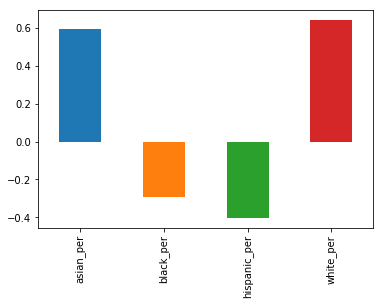

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline
correlations[['asian_per','black_per','hispanic_per','white_per']].plot(kind='bar')


Digging  for schools with high hispanic percents

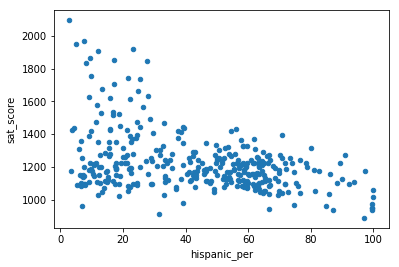

In [18]:
combined.plot(x='hispanic_per',y='sat_score',kind='scatter')
plt.show()

from the above plot , as the hispanic increase , the negative corrleation appear more
let's check for hispanic_per > 90

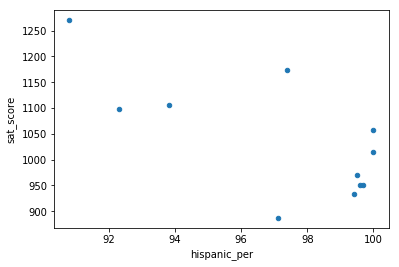

In [19]:
combined[combined['hispanic_per']>90].plot(x='hispanic_per',y='sat_score',kind='scatter')

Visualizing the association between the sat score and gender

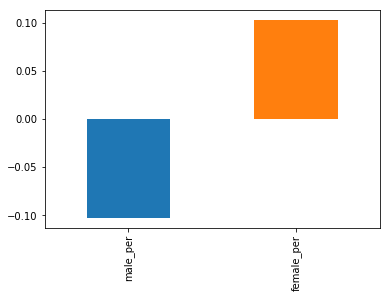

In [20]:
correlations[['male_per','female_per']].plot(kind='bar')
plt.show()

Visualizing the association between the female_per and sat score

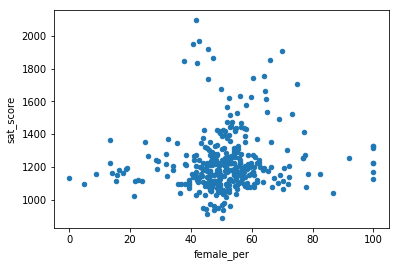

In [21]:
combined.plot(x='female_per',y='sat_score',kind='scatter')
plt.show()

Visualizing the association between the female_per and class_size

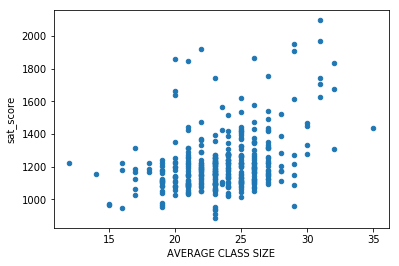

In [22]:
combined.plot(x='AVERAGE CLASS SIZE',y='sat_score',kind='scatter')
plt.show()

Visualizing sat score by district location 

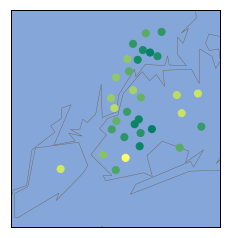

In [23]:
from mpl_toolkits.basemap import Basemap
m = Basemap(
    projection='merc', 
    llcrnrlat=40.477399, 
    urcrnrlat=40.917577, 
    llcrnrlon=-74.259090, 
    urcrnrlon=-73.700272,
    resolution='i'
)

m.drawmapboundary(fill_color='#85A6D9')
m.drawcoastlines(color='#6D5F47', linewidth=.4)
m.drawrivers(color='#6D5F47', linewidth=.4)
district=combined.groupby('school_dist').mean()
m.scatter(district['lon'].tolist(),district['lat'].tolist(),s=50,zorder=2,latlon=True,c=district['sat_score'],cmap='summer')
plt.show()